# 교보문고 베스트셀러 데이터 분석

# 0. 모듈 & 라이브러리

In [333]:
import pandas as pd
import numpy as np
import nltk
from konlpy.tag import Okt 
# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/HMFMMUEX.ttc").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

# 카운터 모듈
from collections import Counter

import warnings  
warnings.filterwarnings('ignore')


In [193]:
df = pd.read_csv('kyobo_merge.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,id,klover,comment,keyword,score,total,title,barcode,author,publisher,price,category
0,st**05,4,추천받자마자 망설임없이 바로 구매한 책입니다.(덕분에 선착순으로 예쁜 초도 같이 받...,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리
1,db**jd661,4,평이 좋아서 구매했는데 활용하기 좋은거 같아요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리
2,an**ldms89,4,완전좋아요 꼭사세요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리
3,ky**ng4757,4,읽기 편하고 좋아요 만족합니다,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리
4,mi**2013,4,더 많은 디자인이 있으면 좋겠어요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리


In [200]:
df_count= pd.DataFrame(df['category'].value_counts())
df_count = df_count.rename(columns={'category':'review_num'})
df_count['category'] = df_count.index
df_count.reset_index(drop=True, inplace=True)
df_count= df_count.reindex(columns = ['category', 'review_num'])
df_count


,category,review_num
0,소설,27587
1,시/에세이,19954
2,인문,19201
3,어린이(초등),19037
4,중고등참고서,12829
5,초등참고서,9292
6,만화,8763
7,유아(0~7세),8066
8,외국어,7831
9,과학,7048


## 1. 카테고리별 리뷰 수 

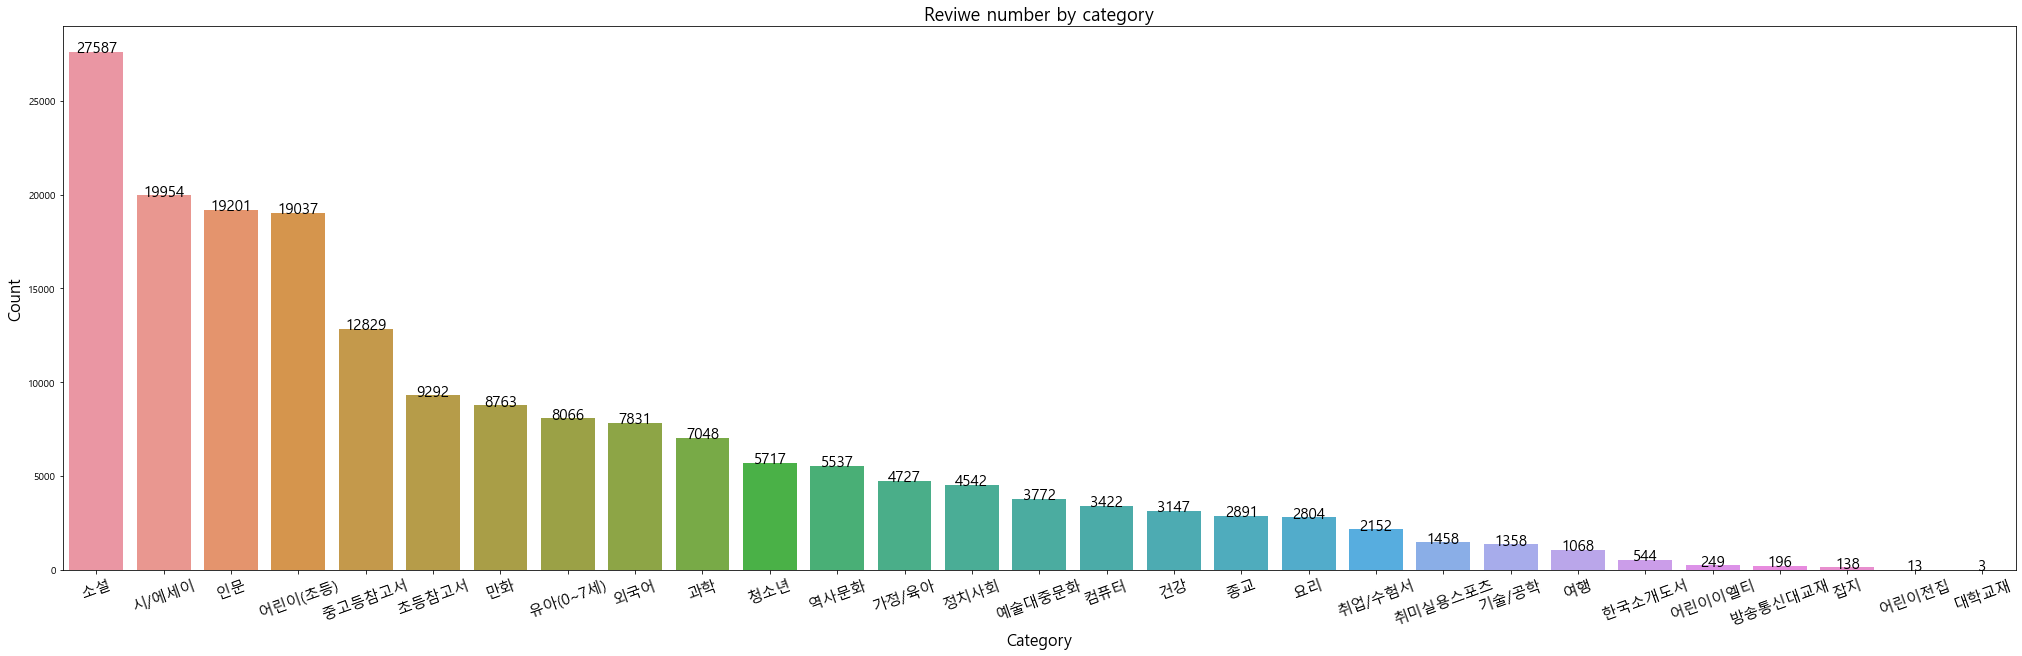

In [205]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=df_count,x='category',y='review_num')
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 
for p in bar.patches: # annotation
    bar.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-20), ha = 'center', size = 15)
plt.xticks(fontsize=15, rotation=20)
plt.show()

- 약 18만 건의 총 리뷰를 카테고리에 따라 분류한 것입니다.
- 각 카테고리 별로 리뷰 갯수를 나타내고 있습니다. 

## 2. 리뷰 수 순으로 도서 정렬

In [261]:
df_total = df[['title','total']]
df_total = df_total.drop_duplicates()
df_total = df_total.sort_values('total',ascending=False).head(30)
df_total.reset_index(drop=True,inplace=True)
df_total

,title,total
0,나미야 잡화점의 기적(양장본 HardCover),1976
1,언어의 온도(170만부 기념 에디션),1913
2,여행의 이유,1586
3,설민석의 조선왕조실록,1491
4,아몬드(양장본 HardCover),1477
5,나는 나로 살기로 했다,1465
6,달러구트 꿈 백화점,1388
7,"곰돌이 푸, 행복한 일은 매일 있어",1318
8,사피엔스,1226
9,코스모스(보급판),1105


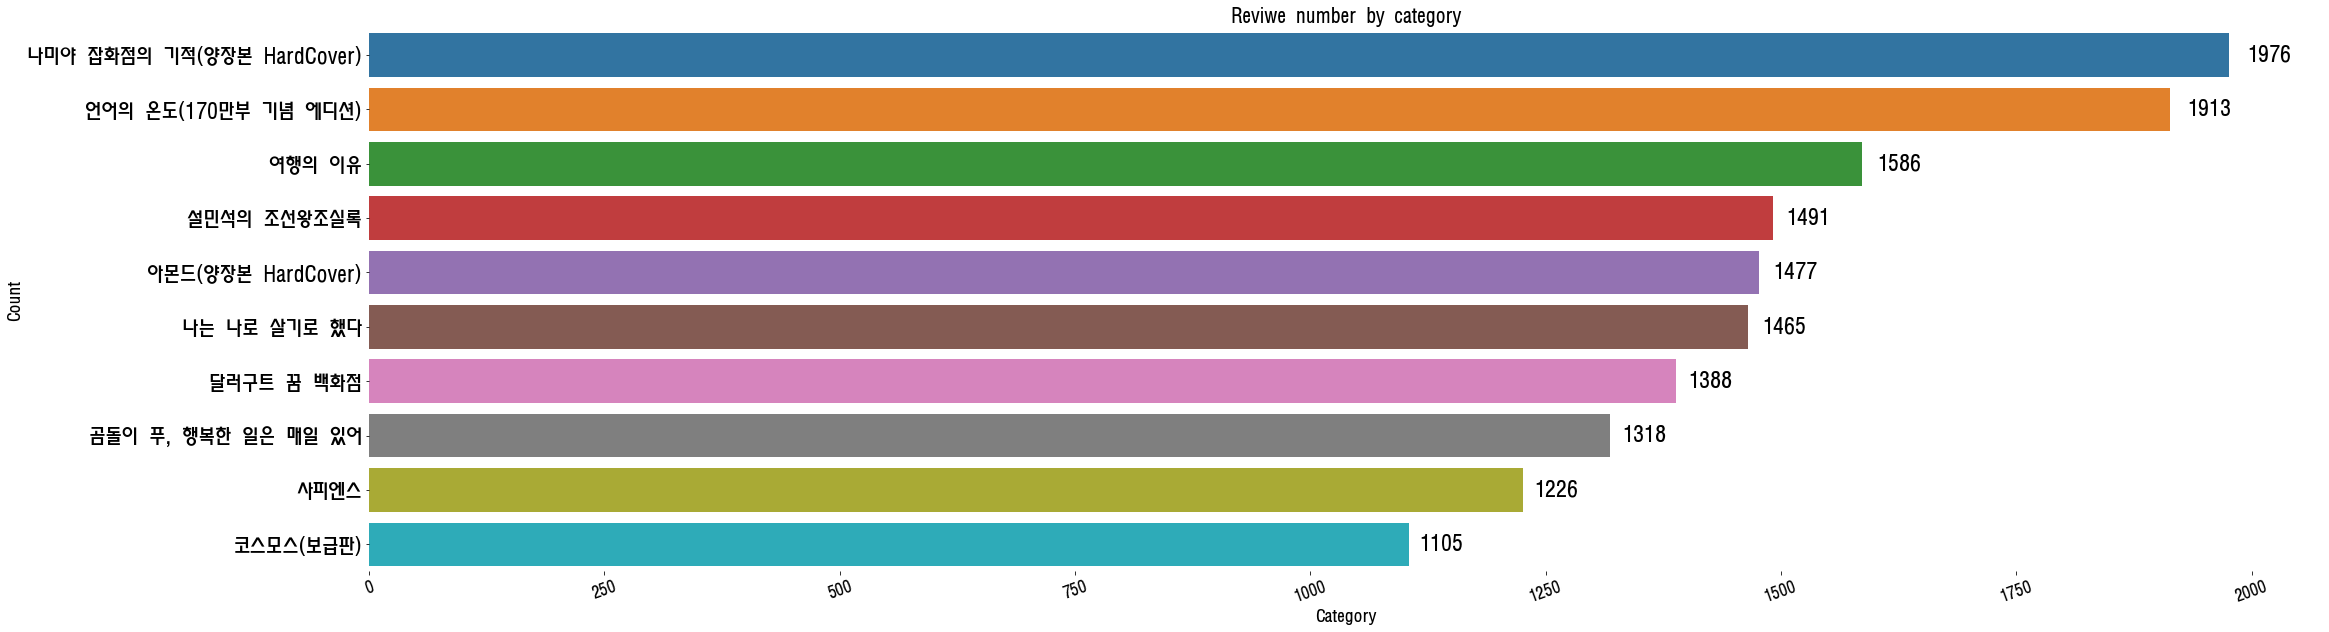

In [258]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=df_total.head(10),x='total',y='title')
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 
for p in bar.patches:
    x, y, width, height = p.get_bbox().bounds
    bar.text(width*1.01, y+height/2, "%.0f"%(width), va='center',size=20)
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=20)
plt.box(False)
plt.show()

-  리뷰 갯수가 많은 책을 상위 10개로 나타낸 것입니다.

## 3. 카테고리별 키워드 분석

In [267]:
df.head()

,id,klover,comment,keyword,score,total,title,barcode,author,publisher,price,category
0,st**05,4,추천받자마자 망설임없이 바로 구매한 책입니다.(덕분에 선착순으로 예쁜 초도 같이 받...,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리
1,db**jd661,4,평이 좋아서 구매했는데 활용하기 좋은거 같아요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리
2,an**ldms89,4,완전좋아요 꼭사세요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리
3,ky**ng4757,4,읽기 편하고 좋아요 만족합니다,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리
4,mi**2013,4,더 많은 디자인이 있으면 좋겠어요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크,9.791191e+12,지은혜(아이라이크케이크),책밥,16000.0,요리


In [322]:
df_kc = df[['keyword','category']] # kc : keyword, category
df_kc = df_kc.drop_duplicates().reset_index(drop=True)
df_kc.dropna(inplace=True)
df_kc

,keyword,category
0,디저트 초코 아이싱 플라워 제과제빵 밀크티,요리
1,마음 모험 연금술 만물 성장소설 영혼,소설
2,순정 혜성 초파리 심사 폐허 허공,소설
3,부총리 전어 기회 반란 디지털 경제 국민,정치사회
4,에세이 그림 인스타그램 그리기 도안 일러스트,예술대중문화
...,...,...
3074,인생 에세이 삶 김나영 여성 시대 아이유,시/에세이
3075,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,시/에세이
3076,일본소설 살인사건 미스터리소설 작품 미스터리 일본 추리 소설,소설
3077,불안 모범 답안 실습 과제 평가 문항 효능감 복습,취미실용스포츠


In [323]:
df_kc.value_counts('category')

,keyword,category
1,마음 모험 연금술 만물 성장소설 영혼,소설
2,순정 혜성 초파리 심사 폐허 허공,소설
25,살인사건 작품 작가 심리 스릴러 조이 처녀,소설
29,작품 반전 소설집 스크립터 단편집 이야기,소설
44,로맨스 시한부 버킷 리스트 계약 죽음 작별 인사,소설
...,...,...
3042,소설집 마음 중 단편 소설 젊은작가상 타인 소설가,소설
3054,여행 작가 작품 귀환자 한국 문학 이동기,소설
3055,살인사건 아버지 수기 장판 비밀 여학생,소설
3059,한국소설 소설집 현주 승아 뉴욕 어머니,소설


In [282]:
keyword_list = df_novel.keyword.values.tolist()

In [ ]:
## 카테고리 별로 barplot, wc 자동화 
df_novel =df_kc[df_kc['category']=='종교'] # 카테고리명만 변경하기
keyword_list = df_novel.keyword.values.tolist()

for i in range(len(keyword_list)):
    if type(keyword_list[i]) != str:
        keyword_list[i] = str(keyword_list[i])
        
# 수집한 글들을 한 문장으로 합치기
keyword_text = ''

for each_line in keyword_list[:]:
    keyword_text = keyword_text + each_line
keyword_text = keyword_text.split(' ')

keyword_counter =Counter(keyword_text)
keyword_counter.most_common(100)

In [416]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.',' ', '\n', 'nan','소설','한국','문학','작가','작품','집']

keyword_text = [word for word in keyword_text if not word in stop_words] #불용어 제거
keyword_counter = Counter(keyword_text)
rank=keyword_counter.most_common(15)
rank

[('사랑', 18),
 ('소설집', 11),
 ('영화원작소설', 10),
 ('삶', 8),
 ('판타지소설', 8),
 ('장편소설', 8),
 ('죽음', 7),
 ('SF소설', 7),
 ('서스펜스', 7),
 ('반전', 6),
 ('영미소설', 6),
 ('노벨문학상', 5),
 ('일본', 5),
 ('아버지', 5),
 ('스릴러소설', 5)]

In [417]:
data = pd.DataFrame.from_dict(dict(rank),orient='index')

,0
사랑,18
소설집,11
영화원작소설,10
삶,8
판타지소설,8
장편소설,8
죽음,7
SF소설,7
서스펜스,7
반전,6


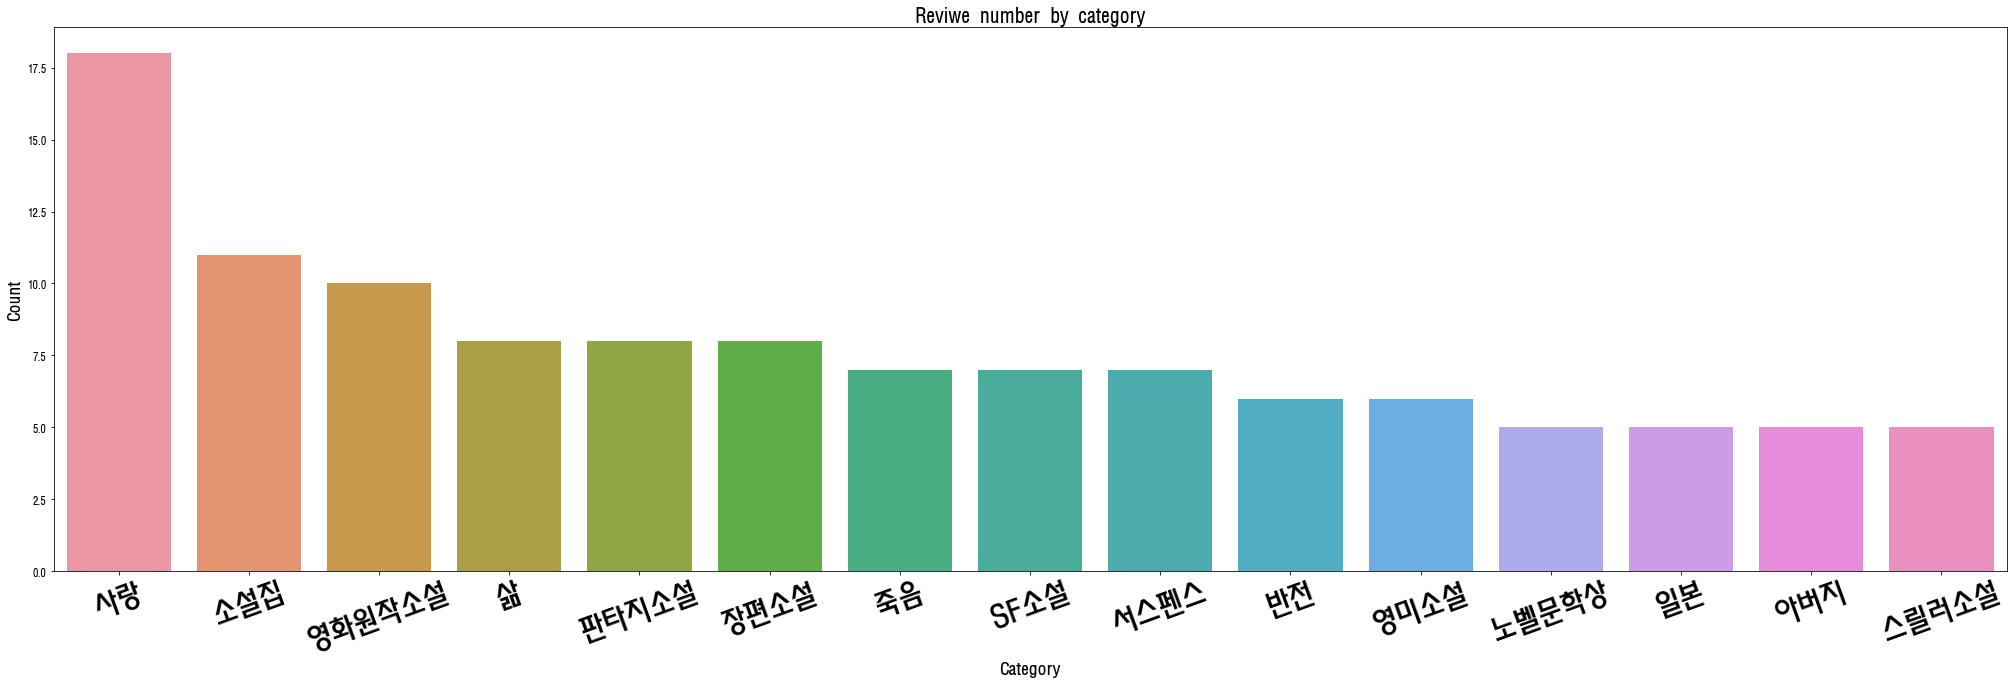

In [419]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=data,x=data.index,y=data[0])
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 

plt.xticks(fontsize=30, rotation=20)
plt.show()

- 소설 카테고리의 키워드를 상위 15개로 나타낸 그래프입니다.

In [420]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

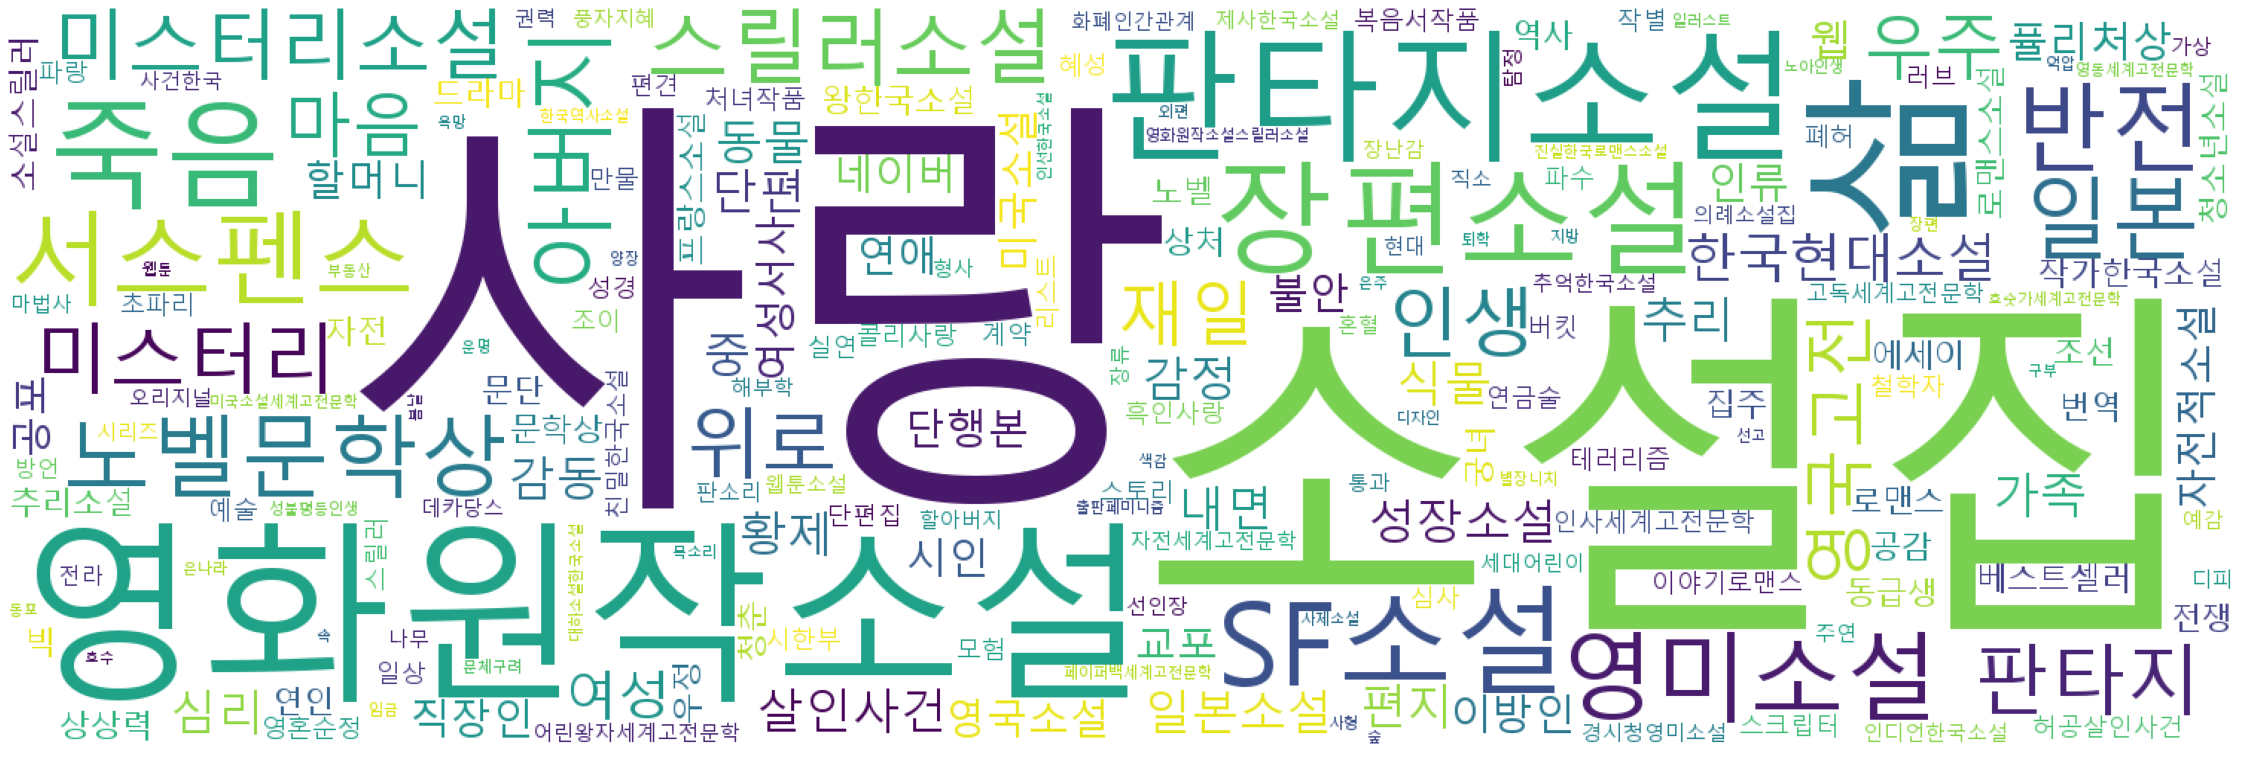

In [421]:
# wordcloud
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',  # 윈도우:'c:/Windows/Fonts/malgun.ttf'
                      relative_scaling = 0.4, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      width=1500, height=500).generate_from_frequencies(dict(keyword_counter))
plt.figure(figsize=(40,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- 소설 장르의 키워드를 빈도 수로 하여 그려본 워드 클라우드입니다.

# 4. 전체 리뷰 단어 분석

In [424]:
content_list = df.comment.values.tolist()

In [425]:
# 수집한 글들을 한 문장으로 합치기
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [431]:
# 형태소 분석기를 통해 명사만 추출하는 함수
def tokenizer_konlpy(text):
    okt=Okt()  
    return [word for word in okt.nouns(text)] 
noun_token = tokenizer_konlpy(content_text)
print(noun_token)

['추천', '바로', '구매', '책', '덕분', '선착순', '초도', '제', '것', '뿐', '것', '책', '레터', '링', '케이크', '상태', '도', '것', '알', '디자인', '알', '수', '요즘', '유행', '케이크', '인기', '케이크', '저', '책', '먼저', '접', '역시', '실력', '책', '정독', '책', '디자인', '얼른', '여러', '디자인', '보고', '생각', '책', '평이', '구매', '활용', '거', '완전', '꼭', '더', '디자인', '누나', '정말', '이', '책', '통해', '만', '전체', '볼', '만해', '책', '디피', '상품', '신건', '환불', '상품', '책', '몇장', '장', '지모', '새', '책', '구매', '디자인', '케이크', '주문', '케이크', '때', '도움', '것', '설명', '제', '수', '제지', '증', '케이크', '관심', '기초', '누', '컬러', '조색', '팁', '등', '독학', '책', '발견', '바로', '구매', '도움', '책', '기초', '케이크', '여러가지', '기초', '장비', '지식', '저', '정말', '재료', '기초', '필요', '장비', '더욱', '폭', '이해', '그림', '떡', '그대', '케이크', '책', '초보자', '정말', '볼', '수', '책', '누', '종류', '별로', '법', '케이크', '데커', '레이', '션', '방법', '보기', '정리', '정말', '인생', '갈림길', '때', '도움', '유투', '버', '지식', '칼', '추천', '소장', '책', '주문', '완료', '주변', '필독', '추천', '삶', '대한', '자세', '새로이', '다시', '또', '감동', '이', '책', '내', '표지', '무엇', '생각', '제', '삶', '표지', '이', '책', '걸', '깨', '마음', 

In [435]:
ko = nltk.Text(tokens_ko)   
print(len(noun_token))          # 토큰 전체 갯수
print(len(set(noun_token)))     # 토큰 unique 갯수

9882
2009


In [436]:
ko = nltk.Text(noun_token)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('책', 694),
 ('마음', 201),
 ('공감', 171),
 ('것', 160),
 ('아이', 137),
 ('수', 129),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('이', 80),
 ('때', 74),
 ('위로', 72),
 ('다시', 71),
 ('내', 67),
 ('선물', 67),
 ('대해', 66),
 ('정말', 61),
 ('나', 59),
 ('요', 57),
 ('더', 56),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('알', 51),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('저', 43),
 ('보고', 43),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('대한', 38),
 ('꼭', 37),
 ('그', 37),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('해', 33),
 ('다른', 33),
 ('독해력', 33),
 ('또', 32),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('제', 24),
 ('배송', 24),
 ('번', 24),
 ('위', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22),
 ('조금', 22),
 ('좀', 22),
 ('어휘', 22),
 ('요즘', 21),
 ('통해', 21),


In [459]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.',' ', '\n','\n ', 'nan','소설','대한','보고','정말','대해','책','것','수','이','내','때','나','요','더','알','꼭','그','저','제','번','위','해','다른','또']

noun_token = [each_word for each_word in noun_token
             if each_word not in stop_words]

ko = nltk.Text(noun_token)
ko.vocab().most_common(50)

[('마음', 201),
 ('공감', 171),
 ('아이', 137),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('위로', 72),
 ('다시', 71),
 ('선물', 67),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('독해력', 33),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('배송', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22)]

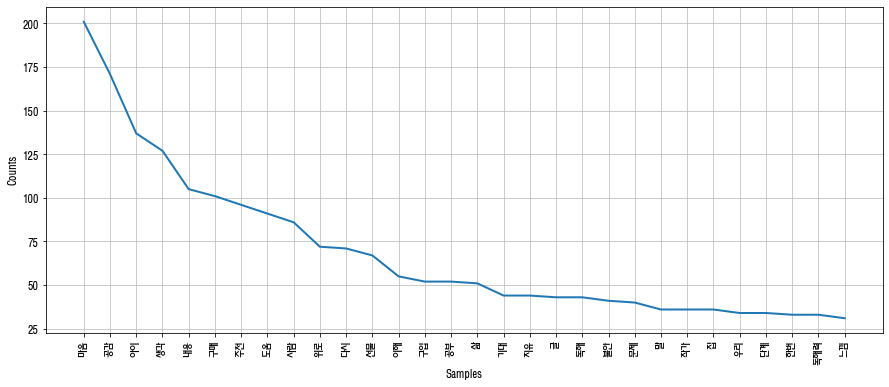

In [460]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(30) 
plt.show()

- 전체 리뷰에서 명사만 추출한 것입니다.

In [452]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [453]:
data = ko.vocab().most_common(300)
data

[('마음', 201),
 ('공감', 171),
 ('아이', 137),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('위로', 72),
 ('다시', 71),
 ('선물', 67),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('해', 33),
 ('다른', 33),
 ('독해력', 33),
 ('또', 32),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('배송', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22),
 ('조금', 22),
 ('좀', 22),
 ('어휘', 22),
 ('요즘', 21),
 ('통해', 21),
 ('아주', 21),
 ('사랑', 21),
 ('심리학', 21),
 ('주문', 20),
 ('듯', 20),
 ('개', 20),
 ('교재', 20),
 ('설명', 19),
 ('별로', 19),
 ('줄', 19),
 ('권', 19),
 ('부분', 19),
 ('소장', 18),
 ('처음', 18),
 ('지인', 18),
 ('여행', 18),
 ('힐링', 18),
 ('도서', 18),
 ('분', 18),
 ('구

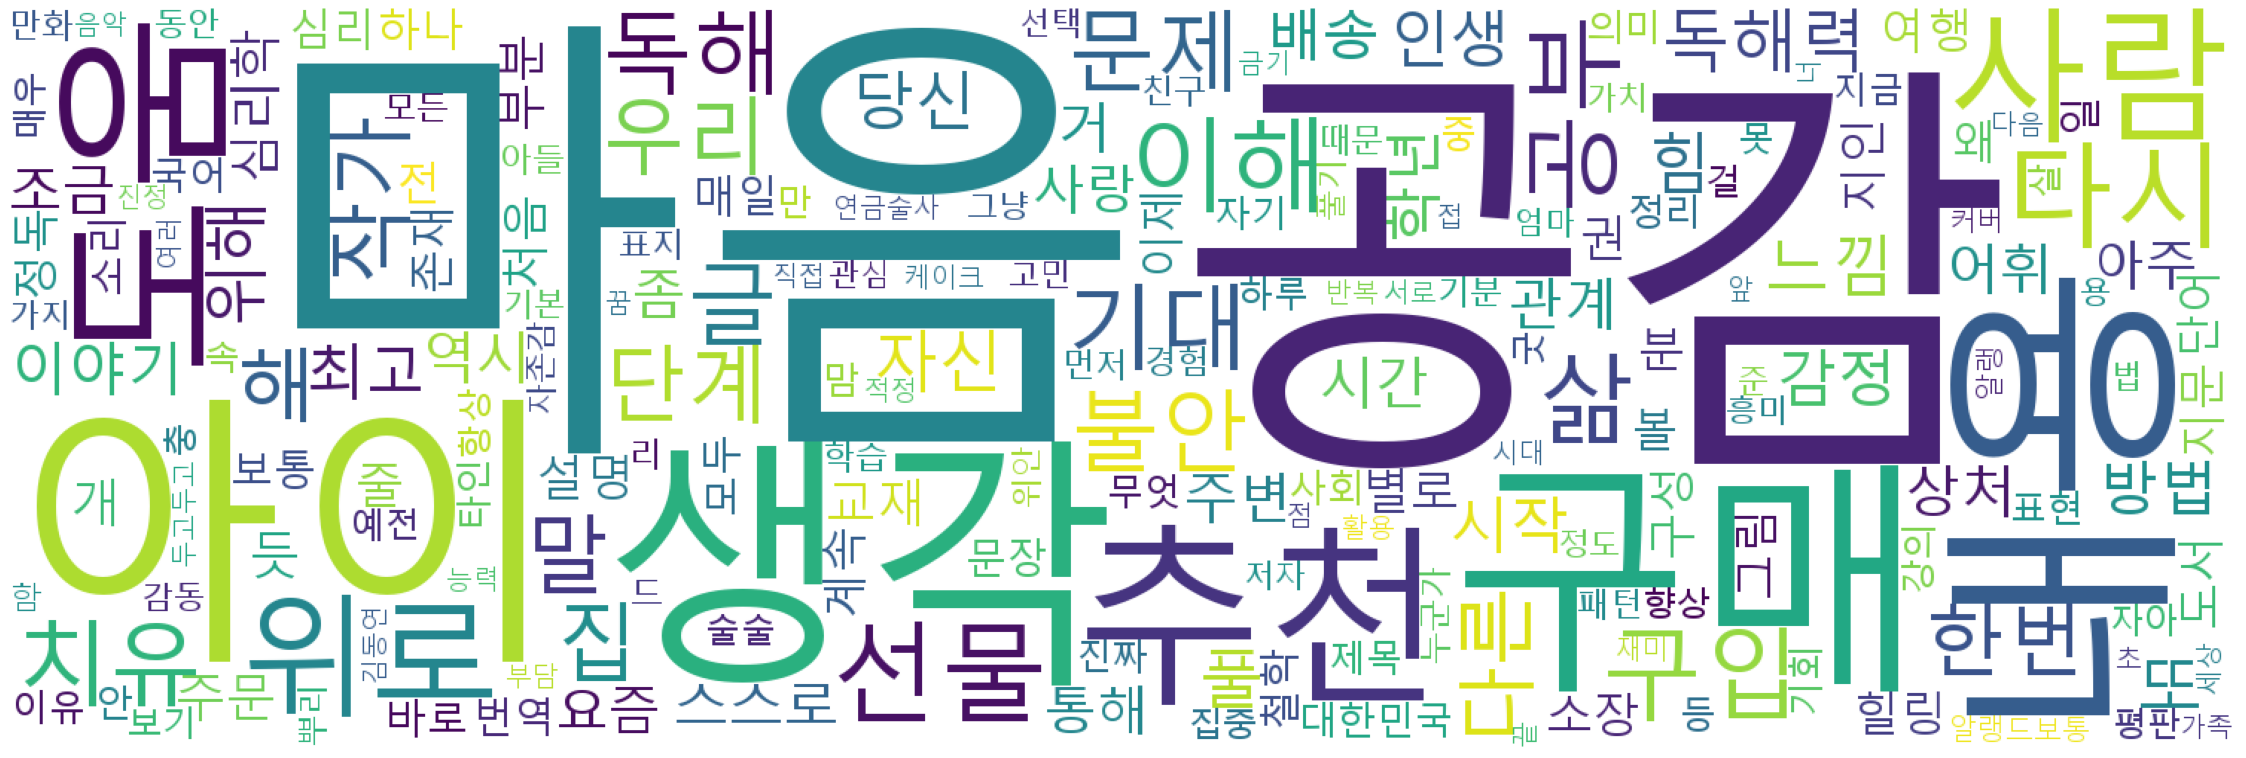

In [463]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',  # 윈도우:'c:/Windows/Fonts/malgun.ttf'
                      relative_scaling = 0.4, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      width=1500, height=500).generate_from_frequencies(dict(data))
plt.figure(figsize=(40,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- 전체 리뷰에서 명사만 추출한 것입니다.

In [80]:
df_pe=df[df['카테고리']=='시/에세이']
df_pe

,id,klover,comment,keyword,score,total,title,순위,바코드,도서명,저자명,출판사명,출간일,정가,카테고리,담당자
648,bj**52,4,확실한 건. 이 책을 읽고 나면 내 세상이 온통 분홍빛으로 물들 것 이라는 점.작가...,사랑 한국에세이 작가 마음 여행 에세이 베스트셀러,9.9,16,미워하는 미워하는 미워하는 마음 없이,98.0,9.788930e+12,미워하는 미워하는 미워하는 마음 없이,유지혜,김영사,20211108.0,14500.0,시/에세이,1.0
649,dm**ud707,4,질투 날 만큼 순수한 문체. 꾸밈이 없다. 사랑스럽게 비범하다.,사랑 한국에세이 작가 마음 여행 에세이 베스트셀러,9.9,16,미워하는 미워하는 미워하는 마음 없이,98.0,9.788930e+12,미워하는 미워하는 미워하는 마음 없이,유지혜,김영사,20211108.0,14500.0,시/에세이,1.0
650,ch**l127,4,사랑은 내 평생의 유행이다,사랑 한국에세이 작가 마음 여행 에세이 베스트셀러,9.9,16,미워하는 미워하는 미워하는 마음 없이,98.0,9.788930e+12,미워하는 미워하는 미워하는 마음 없이,유지혜,김영사,20211108.0,14500.0,시/에세이,1.0
651,dh**entl01,4,쉬운천국을 읽으며 심어뒀던 마음 속 씨앗에서 미워하는 마음 없이를 읽는 동안 새싹이...,사랑 한국에세이 작가 마음 여행 에세이 베스트셀러,9.9,16,미워하는 미워하는 미워하는 마음 없이,98.0,9.788930e+12,미워하는 미워하는 미워하는 마음 없이,유지혜,김영사,20211108.0,14500.0,시/에세이,1.0
652,44**0717,4,입체는 다각도에서 보지 않으면 쉽게 한 부분만을 전체의 모습으로 착각하게 된다. 이...,사랑 한국에세이 작가 마음 여행 에세이 베스트셀러,9.9,16,미워하는 미워하는 미워하는 마음 없이,98.0,9.788930e+12,미워하는 미워하는 미워하는 마음 없이,유지혜,김영사,20211108.0,14500.0,시/에세이,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182989,gd**0613,4,뜻밖에 사게 된 책 이 책이 오고서 제 머리가 더 맑아지는것같네요.,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,9.2,368,스물아홉 생일 1년 후 죽기로 결심했다,13.0,9.788960e+12,스물아홉 생일 1년 후 죽기로 결심했다,하야마 아마리,위즈덤하우스,20120720.0,12800.0,시/에세이,3.0
182990,NaN,4,정말 외롭고 흔들렸던 마음 다시 잡을 수 있는 따뜻했던 소설 이였습니다.,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,9.2,368,스물아홉 생일 1년 후 죽기로 결심했다,13.0,9.788960e+12,스물아홉 생일 1년 후 죽기로 결심했다,하야마 아마리,위즈덤하우스,20120720.0,12800.0,시/에세이,3.0
182991,rk**23,4,새해 맞아서 새로운 다짐으로 읽을만한 책,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,9.2,368,스물아홉 생일 1년 후 죽기로 결심했다,13.0,9.788960e+12,스물아홉 생일 1년 후 죽기로 결심했다,하야마 아마리,위즈덤하우스,20120720.0,12800.0,시/에세이,3.0
182992,NaN,4,책을 구매하고 하루만에 다읽은 책은 처음이에요\n\n\n\n책을 읽을때 꼭 누가 나...,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,9.2,368,스물아홉 생일 1년 후 죽기로 결심했다,13.0,9.788960e+12,스물아홉 생일 1년 후 죽기로 결심했다,하야마 아마리,위즈덤하우스,20120720.0,12800.0,시/에세이,3.0
